In [1045]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # so we can beautify the plots
import statsmodels.api as sm 
from  statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


data = pd.read_csv('../FoodPrices/FoodImports/Prices-PivotTable7.csv')
data = data.reset_index()
data.drop(columns=['level_0'], inplace=True)
data.columns =  ['Food'] + list(data.columns[1:])
data.index = data['Food']
data.drop(columns=['Food', '1999'], inplace=True)
data.drop('Commodity', axis=0, inplace=True)
data = data.iloc[:, [0, 1,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2]]
time_series = data.loc[:,'2000':'2023' ].copy()
# time_series.drop('Live meat animals', axis=0, inplace=True)

# time_series=time_series.astype(int)
for i in list(time_series.columns):
    time_series[i] = time_series[i].apply(lambda x: int(str(x).replace(',', '')) )    
types = { str(i).strip(','):int for i in set(time_series.columns) }

percentages = time_series[:13].copy()
prices = time_series[13:-1].copy()

time_series = time_series.astype(types) 
time_series

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Food,,,,,,,,,,,,,,,,,,,,,
Beverages,-2,-1,6,-1,3,7,4,4,3,-4,...,1,-1,-2,1,3,0,-5,4,2,-2
Cocoa and chocolate,-15,10,24,21,-9,-1,1,11,26,0,...,14,0,2,-7,0,4,2,1,9,15
"Coffee, tea, and spices",-9,-25,0,12,7,21,6,13,15,-5,...,7,1,-6,7,-5,-6,4,13,28,-2
Dairy,0,-1,-1,8,14,-2,3,9,26,-10,...,3,-14,-9,2,11,0,1,15,5,8
Fish and shellfish,9,-5,-5,0,0,3,5,4,5,-7,...,9,-9,2,8,1,0,-5,17,5,-8
Fruits,-1,3,2,6,5,12,7,10,9,0,...,6,2,4,4,3,5,-1,11,11,2
Grains,9,-3,19,23,4,5,-1,6,18,-1,...,12,4,2,-1,8,11,4,14,16,-2
Live meat animals,11,5,-9,-33,-17,46,18,5,-6,1,...,32,-13,-21,-4,4,11,-8,-7,13,13
Meats,7,7,-3,6,17,3,1,2,9,-11,...,11,-1,-8,2,6,6,2,15,1,-1


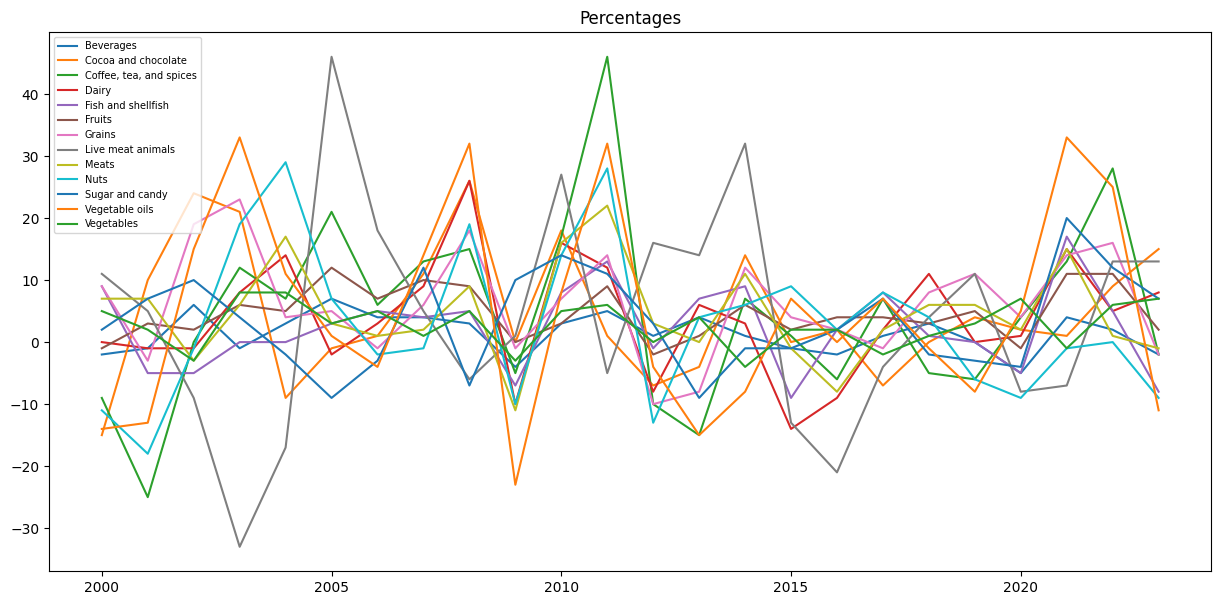

In [1046]:

ax = percentages.T.plot( use_index=True, figsize=(15,7), title='Percentages')
ax.legend(fontsize=7)  # Opciones como 'small', 'medium', 'large', o un valor numérico
plt.show()



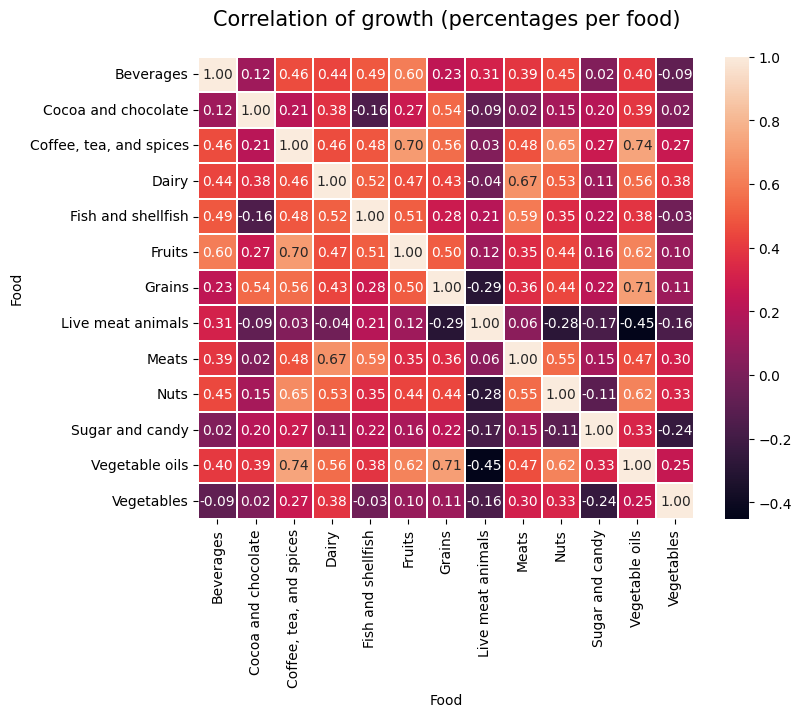

In [1047]:
corr = percentages.T.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt='.2f', linewidths=.30)
plt.title('Correlation of growth (percentages per food)', y =1.05,  size=15)
pos, textvals = plt.yticks()
# plt.yticks(pos,('GLD(USD)','SPX(USD)','BARR(USD)','SLV(USD)'), 
#     rotation=0, fontsize="10", va="center")

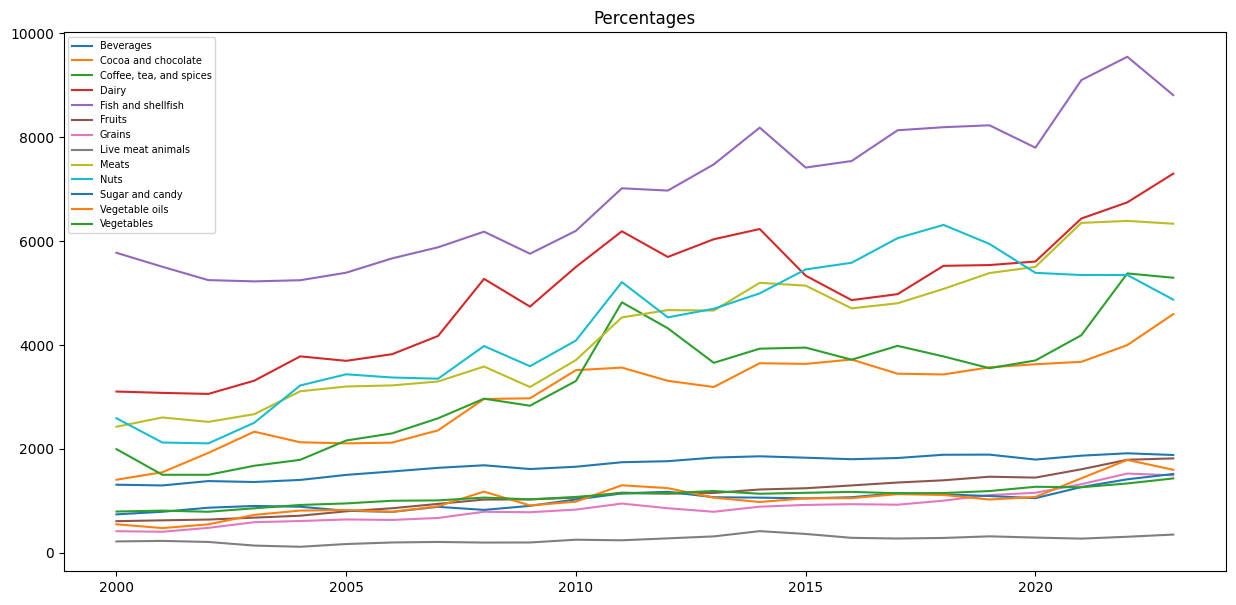

In [1048]:
ax = prices.T.plot( use_index=True, figsize=(15,7), title='Percentages')
ax.legend(fontsize=7)  # Opciones como 'small', 'medium', 'large', o un valor numérico
plt.show()


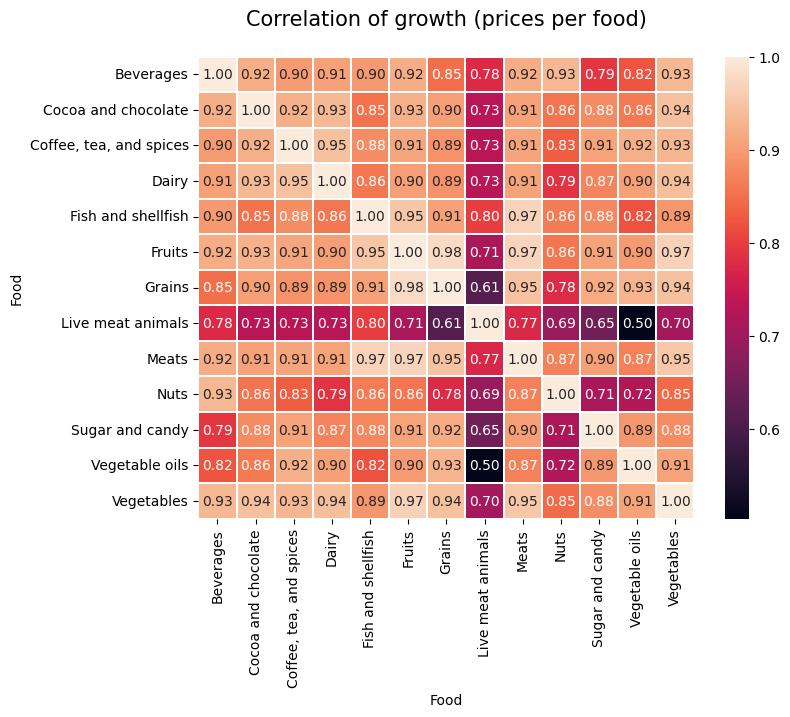

In [1049]:
corr = prices.T.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt='.2f', linewidths=.30)
plt.title('Correlation of growth (prices per food)', y =1.05,  size=15)
pos, textvals = plt.yticks()

In [1050]:
print(corr['Fish and shellfish'].sort_values(ascending =False), '\n')


Food
Fish and shellfish         1.000000
Meats                      0.968106
Fruits                     0.950271
Grains                     0.905124
Beverages                  0.895815
Vegetables                 0.891814
Coffee, tea, and spices    0.883066
Sugar and candy            0.877104
Nuts                       0.862888
Dairy                      0.859711
Cocoa and chocolate        0.852803
Vegetable oils             0.820204
Live meat animals          0.800145
Name: Fish and shellfish, dtype: float64 


In [1051]:
'''
function result = johansen(x,p,k)
% PURPOSE: perform Johansen cointegration tests
% -------------------------------------------------------
% USAGE: result = johansen(x,p,k)
% where:      x = input matrix of time-series in levels, (nobs x m)
%             p = order of time polynomial in the null-hypothesis
%                 p = -1, no deterministic part
%                 p =  0, for constant term
%                 p =  1, for constant plus time-trend
%                 p >  1, for higher order polynomial
%             k = number of lagged difference terms used when
%                 computing the estimator
% -------------------------------------------------------
% RETURNS: a results structure:
%          result.eig  = eigenvalues  (m x 1)
%          result.evec = eigenvectors (m x m), where first
%                        r columns are normalized coint vectors
%          result.lr1  = likelihood ratio trace statistic for r=0 to m-1
%                        (m x 1) vector
%          result.lr2  = maximum eigenvalue statistic for r=0 to m-1
%                        (m x 1) vector
%          result.cvt  = critical values for trace statistic
%                        (m x 3) vector [90% 95% 99%]
%          result.cvm  = critical values for max eigen value statistic
%                        (m x 3) vector [90% 95% 99%]
%          result.ind  = index of co-integrating variables ordered by
%                        size of the eigenvalues from large to small
% -------------------------------------------------------
% NOTE: c_sja(), c_sjt() provide critical values generated using
%       a method of MacKinnon (1994, 1996).
%       critical values are available for n<=12 and -1 <= p <= 1,
%       zeros are returned for other cases.
% -------------------------------------------------------
% SEE ALSO: prt_coint, a function that prints results
% -------------------------------------------------------
% References: Johansen (1988), 'Statistical Analysis of Co-integration
% vectors', Journal of Economic Dynamics and Control, 12, pp. 231-254.
% MacKinnon, Haug, Michelis (1996) 'Numerical distribution
% functions of likelihood ratio tests for cointegration',
% Queen's University Institute for Economic Research Discussion paper.
% (see also: MacKinnon's JBES 1994 article
% -------------------------------------------------------

% written by:
% James P. LeSage, Dept of Economics
% University of Toledo
% 2801 W. Bancroft St,
% Toledo, OH 43606
% jlesage@spatial-econometrics.com

% ****************************************************************
% NOTE: Adina Enache provided some bug fixes and corrections that
%       she notes below in comments. 4/10/2000
% ****************************************************************
'''

import numpy as np
from numpy import zeros, ones, flipud, log
from numpy.linalg import inv, eig, cholesky as chol
from statsmodels.regression.linear_model import OLS


tdiff = np.diff

class Holder(object):
    pass

def rows(x):
    return x.shape[0]

def trimr(x, front, end):
    if end > 0:
        return x[front:-end]
    else:
        return x[front:]

import statsmodels.tsa.tsatools as tsat
mlag = tsat.lagmat

def mlag_(x, maxlag):
    '''return all lags up to maxlag
    '''
    return x[:-lag]

def lag(x, lag):
    return x[:-lag]

def detrend(y, order):
    if order == -1:
        return y
    return OLS(y, np.vander(np.linspace(-1, 1, len(y)), order + 1)).fit().resid

def resid(y, x):
    r = y - np.dot(x, np.dot(np.linalg.pinv(x), y))
    return r




def coint_johansen(x, p, k, print_on_console=True):

    #    % error checking on inputs
    #    if (nargin ~= 3)
    #     error('Wrong # of inputs to johansen')
    #    end
    nobs, m = x.shape

    # why this?  f is detrend transformed series, p is detrend data
    if (p > -1):
        f = 0
    else:
        f = p

    x = detrend(x, p)
    dx = tdiff(x, 1, axis=0)
    # dx    = trimr(dx,1,0)
    z = mlag(dx, k)  # [k-1:]
#    print z.shape
    z = trimr(z, k, 0)
    z = detrend(z, f)
#    print dx.shape
    dx = trimr(dx, k, 0)

    dx = detrend(dx, f)
    # r0t   = dx - z*(z\dx)
    r0t = resid(dx, z)  # diff on lagged diffs
    # lx = trimr(lag(x,k),k,0)
    lx = lag(x, k)
    lx = trimr(lx, 1, 0)
    dx = detrend(lx, f)
#    print 'rkt', dx.shape, z.shape
    # rkt   = dx - z*(z\dx)
    rkt = resid(dx, z)  # level on lagged diffs
    skk = np.dot(rkt.T, rkt) / rows(rkt)
    sk0 = np.dot(rkt.T, r0t) / rows(rkt)
    s00 = np.dot(r0t.T, r0t) / rows(r0t)
    sig = np.dot(sk0, np.dot(inv(s00), (sk0.T)))
    tmp = inv(skk)
    # du, au = eig(np.dot(tmp, sig))
    au, du = eig(np.dot(tmp, sig))  # au is eval, du is evec
    # orig = np.dot(tmp, sig)

    # % Normalize the eigen vectors such that (du'skk*du) = I
    temp = inv(chol(np.dot(du.T, np.dot(skk, du))))
    dt = np.dot(du, temp)


    # JP: the next part can be done much  easier

    # %      NOTE: At this point, the eigenvectors are aligned by column. To
    # %            physically move the column elements using the MATLAB sort,
    # %            take the transpose to put the eigenvectors across the row

    # dt = transpose(dt)

    # % sort eigenvalues and vectors

    # au, auind = np.sort(diag(au))
    auind = np.argsort(au)
    # a = flipud(au)
    aind = flipud(auind)
    a = au[aind]
    # d = dt[aind,:]
    d = dt[:, aind]

    # %NOTE: The eigenvectors have been sorted by row based on auind and moved to array "d".
    # %      Put the eigenvectors back in column format after the sort by taking the
    # %      transpose of "d". Since the eigenvectors have been physically moved, there is
    # %      no need for aind at all. To preserve existing programming, aind is reset back to
    # %      1, 2, 3, ....

    # d  =  transpose(d)
    # test = np.dot(transpose(d), np.dot(skk, d))

    # %EXPLANATION:  The MATLAB sort function sorts from low to high. The flip realigns
    # %auind to go from the largest to the smallest eigenvalue (now aind). The original procedure
    # %physically moved the rows of dt (to d) based on the alignment in aind and then used
    # %aind as a column index to address the eigenvectors from high to low. This is a double
    # %sort. If you wanted to extract the eigenvector corresponding to the largest eigenvalue by,
    # %using aind as a reference, you would get the correct eigenvector, but with sorted
    # %coefficients and, therefore, any follow-on calculation would seem to be in error.
    # %If alternative programming methods are used to evaluate the eigenvalues, e.g. Frame method
    # %followed by a root extraction on the characteristic equation, then the roots can be
    # %quickly sorted. One by one, the corresponding eigenvectors can be generated. The resultant
    # %array can be operated on using the Cholesky transformation, which enables a unit
    # %diagonalization of skk. But nowhere along the way are the coefficients within the
    # %eigenvector array ever changed. The final value of the "beta" array using either method
    # %should be the same.


    # % Compute the trace and max eigenvalue statistics */
    lr1 = zeros(m)
    lr2 = zeros(m)
    cvm = zeros((m, 3))
    cvt = zeros((m, 3))
    iota = ones(m)
    t, junk = rkt.shape
    for i in range(0, m):
        tmp = trimr(log(iota - a), i , 0)
        lr1[i] = -t * np.sum(tmp, 0)  # columnsum ?
        # tmp = np.log(1-a)
        # lr1[i] = -t * np.sum(tmp[i:])
        lr2[i] = -t * log(1 - a[i])
        cvm[i, :] = c_sja(m - i, p)
        cvt[i, :] = c_sjt(m - i, p)
        aind[i] = i
    # end

    result = Holder()
    # % set up results structure
    # estimation results, residuals
    result.rkt = rkt
    result.r0t = r0t
    result.eig = a
    result.evec = d  # transposed compared to matlab ?
    result.lr1 = lr1
    result.lr2 = lr2
    result.cvt = cvt
    result.cvm = cvm
    result.ind = aind
    result.meth = 'johansen'

    if print_on_console == True:
        print ('--------------------------------------------------')
        print ('--> Trace Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr1)):
            print ('r =', i, '\t', round(result.lr1[i], 4), result.cvt[i, 0], result.cvt[i, 1], result.cvt[i, 2])
        print ('--------------------------------------------------')
        print ('--> Eigen Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr2)):
            print ('r =', i, '\t', round(result.lr2[i], 4), result.cvm[i, 0], result.cvm[i, 1], result.cvm[i, 2])
        print ('--------------------------------------------------')
        print ('eigenvectors:\n', result.evec)
        print ('--------------------------------------------------')
        print ('eigenvalues:\n', result.eig)
        print ('--------------------------------------------------')


    return result

def c_sjt(n, p):

# PURPOSE: find critical values for Johansen trace statistic
# ------------------------------------------------------------
# USAGE:  jc = c_sjt(n,p)
# where:    n = dimension of the VAR system
#               NOTE: routine doesn't work for n > 12
#           p = order of time polynomial in the null-hypothesis
#                 p = -1, no deterministic part
#                 p =  0, for constant term
#                 p =  1, for constant plus time-trend
#                 p >  1  returns no critical values
# ------------------------------------------------------------
# RETURNS: a (3x1) vector of percentiles for the trace
#          statistic for [90# 95# 99#]
# ------------------------------------------------------------
# NOTES: for n > 12, the function returns a (3x1) vector of zeros.
#        The values returned by the function were generated using
#        a method described in MacKinnon (1996), using his FORTRAN
#        program johdist.f
# ------------------------------------------------------------
# SEE ALSO: johansen()
# ------------------------------------------------------------
# # References: MacKinnon, Haug, Michelis (1996) 'Numerical distribution
# functions of likelihood ratio tests for cointegration',
# Queen's University Institute for Economic Research Discussion paper.
# -------------------------------------------------------

# written by:
# James P. LeSage, Dept of Economics
# University of Toledo
# 2801 W. Bancroft St,
# Toledo, OH 43606
# jlesage@spatial-econometrics.com
#
# Ported to Python by Javier Garcia
# javier.macro.trader@gmail.com

# these are the values from Johansen's 1995 book
# for comparison to the MacKinnon values
# jcp0 = [ 2.98   4.14   7.02
#        10.35  12.21  16.16
#        21.58  24.08  29.19
#        36.58  39.71  46.00
#        55.54  59.24  66.71
#        78.30  86.36  91.12
#       104.93 109.93 119.58
#       135.16 140.74 151.70
#       169.30 175.47 187.82
#       207.21 214.07 226.95
#       248.77 256.23 270.47
#       293.83 301.95 318.14];




    jcp0 = ((2.9762, 4.1296, 6.9406),
            (10.4741, 12.3212, 16.3640),
            (21.7781, 24.2761, 29.5147),
            (37.0339, 40.1749, 46.5716),
            (56.2839, 60.0627, 67.6367),
            (79.5329, 83.9383, 92.7136),
            (106.7351, 111.7797, 121.7375),
            (137.9954, 143.6691, 154.7977),
            (173.2292, 179.5199, 191.8122),
            (212.4721, 219.4051, 232.8291),
            (255.6732, 263.2603, 277.9962),
            (302.9054, 311.1288, 326.9716))


    jcp1 = ((2.7055, 3.8415, 6.6349),
            (13.4294, 15.4943, 19.9349),
            (27.0669, 29.7961, 35.4628),
            (44.4929, 47.8545, 54.6815),
            (65.8202, 69.8189, 77.8202),
            (91.1090, 95.7542, 104.9637),
            (120.3673, 125.6185, 135.9825),
            (153.6341, 159.5290, 171.0905),
            (190.8714, 197.3772, 210.0366),
            (232.1030, 239.2468, 253.2526),
            (277.3740, 285.1402, 300.2821),
            (326.5354, 334.9795, 351.2150))

    jcp2 = ((2.7055, 3.8415, 6.6349),
            (16.1619, 18.3985, 23.1485),
            (32.0645, 35.0116, 41.0815),
            (51.6492, 55.2459, 62.5202),
            (75.1027, 79.3422, 87.7748),
            (102.4674, 107.3429, 116.9829),
            (133.7852, 139.2780, 150.0778),
            (169.0618, 175.1584, 187.1891),
            (208.3582, 215.1268, 228.2226),
            (251.6293, 259.0267, 273.3838),
            (298.8836, 306.8988, 322.4264),
            (350.1125, 358.7190, 375.3203))



    if (p > 1) or (p < -1):
        jc = (0, 0, 0)
    elif (n > 12) or (n < 1):
        jc = (0, 0, 0)
    elif p == -1:
        jc = jcp0[n - 1]
    elif p == 0:
        jc = jcp1[n - 1]
    elif p == 1:
        jc = jcp2[n - 1]



    return jc

def c_sja(n, p):

# PURPOSE: find critical values for Johansen maximum eigenvalue statistic
# ------------------------------------------------------------
# USAGE:  jc = c_sja(n,p)
# where:    n = dimension of the VAR system
#           p = order of time polynomial in the null-hypothesis
#                 p = -1, no deterministic part
#                 p =  0, for constant term
#                 p =  1, for constant plus time-trend
#                 p >  1  returns no critical values
# ------------------------------------------------------------
# RETURNS: a (3x1) vector of percentiles for the maximum eigenvalue
#          statistic for: [90# 95# 99#]
# ------------------------------------------------------------
# NOTES: for n > 12, the function returns a (3x1) vector of zeros.
#        The values returned by the function were generated using
#        a method described in MacKinnon (1996), using his FORTRAN
#        program johdist.f
# ------------------------------------------------------------
# SEE ALSO: johansen()
# ------------------------------------------------------------
# References: MacKinnon, Haug, Michelis (1996) 'Numerical distribution
# functions of likelihood ratio tests for cointegration',
# Queen's University Institute for Economic Research Discussion paper.
# -------------------------------------------------------

# written by:
# James P. LeSage, Dept of Economics
# University of Toledo
# 2801 W. Bancroft St,
# Toledo, OH 43606
# jlesage@spatial-econometrics.com
# Ported to Python by Javier Garcia
# javier.macro.trader@gmail.com


    jcp0 = ((2.9762, 4.1296, 6.9406),
            (9.4748, 11.2246, 15.0923),
            (15.7175, 17.7961, 22.2519),
            (21.8370, 24.1592, 29.0609),
            (27.9160, 30.4428, 35.7359),
            (33.9271, 36.6301, 42.2333),
            (39.9085, 42.7679, 48.6606),
            (45.8930, 48.8795, 55.0335),
            (51.8528, 54.9629, 61.3449),
            (57.7954, 61.0404, 67.6415),
            (63.7248, 67.0756, 73.8856),
            (69.6513, 73.0946, 80.0937))

    jcp1 = ((2.7055, 3.8415, 6.6349),
            (12.2971, 14.2639, 18.5200),
            (18.8928, 21.1314, 25.8650),
            (25.1236, 27.5858, 32.7172),
            (31.2379, 33.8777, 39.3693),
            (37.2786, 40.0763, 45.8662),
            (43.2947, 46.2299, 52.3069),
            (49.2855, 52.3622, 58.6634),
            (55.2412, 58.4332, 64.9960),
            (61.2041, 64.5040, 71.2525),
            (67.1307, 70.5392, 77.4877),
            (73.0563, 76.5734, 83.7105))

    jcp2 = ((2.7055, 3.8415, 6.6349),
            (15.0006, 17.1481, 21.7465),
            (21.8731, 24.2522, 29.2631),
            (28.2398, 30.8151, 36.1930),
            (34.4202, 37.1646, 42.8612),
            (40.5244, 43.4183, 49.4095),
            (46.5583, 49.5875, 55.8171),
            (52.5858, 55.7302, 62.1741),
            (58.5316, 61.8051, 68.5030),
            (64.5292, 67.9040, 74.7434),
            (70.4630, 73.9355, 81.0678),
            (76.4081, 79.9878, 87.2395))


    if (p > 1) or (p < -1):
        jc = (0, 0, 0)
    elif (n > 12) or (n < 1):
        jc = (0, 0, 0)
    elif p == -1:
        jc = jcp0[n - 1]
    elif p == 0:
        jc = jcp1[n - 1]
    elif p == 1:
        jc = jcp2[n - 1]


    return jc



In [1052]:
# print(percentages.T)
fish = percentages.T['Fish and shellfish']
meat = percentages.T['Meats']
# fish = percentages['Fish and Shellfish']

df= pd.DataFrame({'x':fish, 'y':meat})
print(coint_johansen(df,0,2))

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 20.6184 13.4294 15.4943 19.9349
r = 1 	 10.0099 2.7055 3.8415 6.6349
--------------------------------------------------
--> Eigen Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 10.6085 12.2971 14.2639 18.52
r = 1 	 10.0099 2.7055 3.8415 6.6349
--------------------------------------------------
eigenvectors:
 [[ 0.40500768 -0.12827445]
 [-0.04000889  0.32300068]]
--------------------------------------------------
eigenvalues:
 [0.39659618 0.37914764]
--------------------------------------------------


In [1053]:
from statsmodels.tsa.api import VAR
import numpy as np

data = np.column_stack((percentages.T['Fish and shellfish'], percentages.T['Meats']))
model = VAR(data)
results = model.select_order(maxlags=2)
print(results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      7.559*      7.658*      1918.*      7.582*
1       7.868       8.166       2623.       7.939
2       7.709       8.205       2265.       7.826
-------------------------------------------------


In [1054]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(percentages.T['Fish and shellfish'], autolag='AIC', regression='ct')  # 'ct' incluye tendencia y constante
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.900203
p-value: 0.654564
Critical Values: {'1%': -4.7993511224489795, '5%': -3.7867277551020404, '10%': -3.339917201166181}


In [1055]:
result = adfuller(percentages.T['Meats'], autolag='AIC', regression='ct')  # 'ct' incluye tendencia y constante
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.420752
p-value: 0.854717
Critical Values: {'1%': -4.7284062962962965, '5%': -3.7567874814814814, '10%': -3.323498888888889}


In [1056]:
prices = prices.T
n_obs=5
X_train, X_test = prices[0:-n_obs], prices[-n_obs:]
print(X_train.shape, X_test.shape)

(19, 13) (5, 13)


In [1057]:
X_train_transformed = X_train.diff(5).dropna()
X_train_transformed.head()

Food,Beverages,Cocoa and chocolate,"Coffee, tea, and spices",Dairy,Fish and shellfish,Fruits,Grains,Live meat animals,Meats,Nuts,Sugar and candy,Vegetable oils,Vegetables
2005,189.0,700.0,166.0,591.0,-383.0,190.0,226.0,-50.0,775.0,847.0,69.0,275.0,156.0
2006,269.0,570.0,797.0,745.0,162.0,233.0,228.0,-30.0,617.0,1252.0,-2.0,313.0,190.0
2007,255.0,435.0,1088.0,1116.0,632.0,302.0,191.0,0.0,777.0,1245.0,17.0,348.0,219.0
2008,322.0,630.0,1291.0,1960.0,957.0,348.0,201.0,58.0,917.0,1477.0,-76.0,448.0,206.0
2009,210.0,846.0,1042.0,958.0,510.0,314.0,169.0,83.0,82.0,370.0,17.0,99.0,108.0


In [1058]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print('Fish and shellfish')
augmented_dickey_fuller_statistics(X_train_transformed['Fish and shellfish'])
print('Meats')
augmented_dickey_fuller_statistics(X_train_transformed['Meats'])

Fish and shellfish
ADF Statistic: -6.360993
p-value: 0.000000
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Meats
ADF Statistic: -6.240211
p-value: 0.000000
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


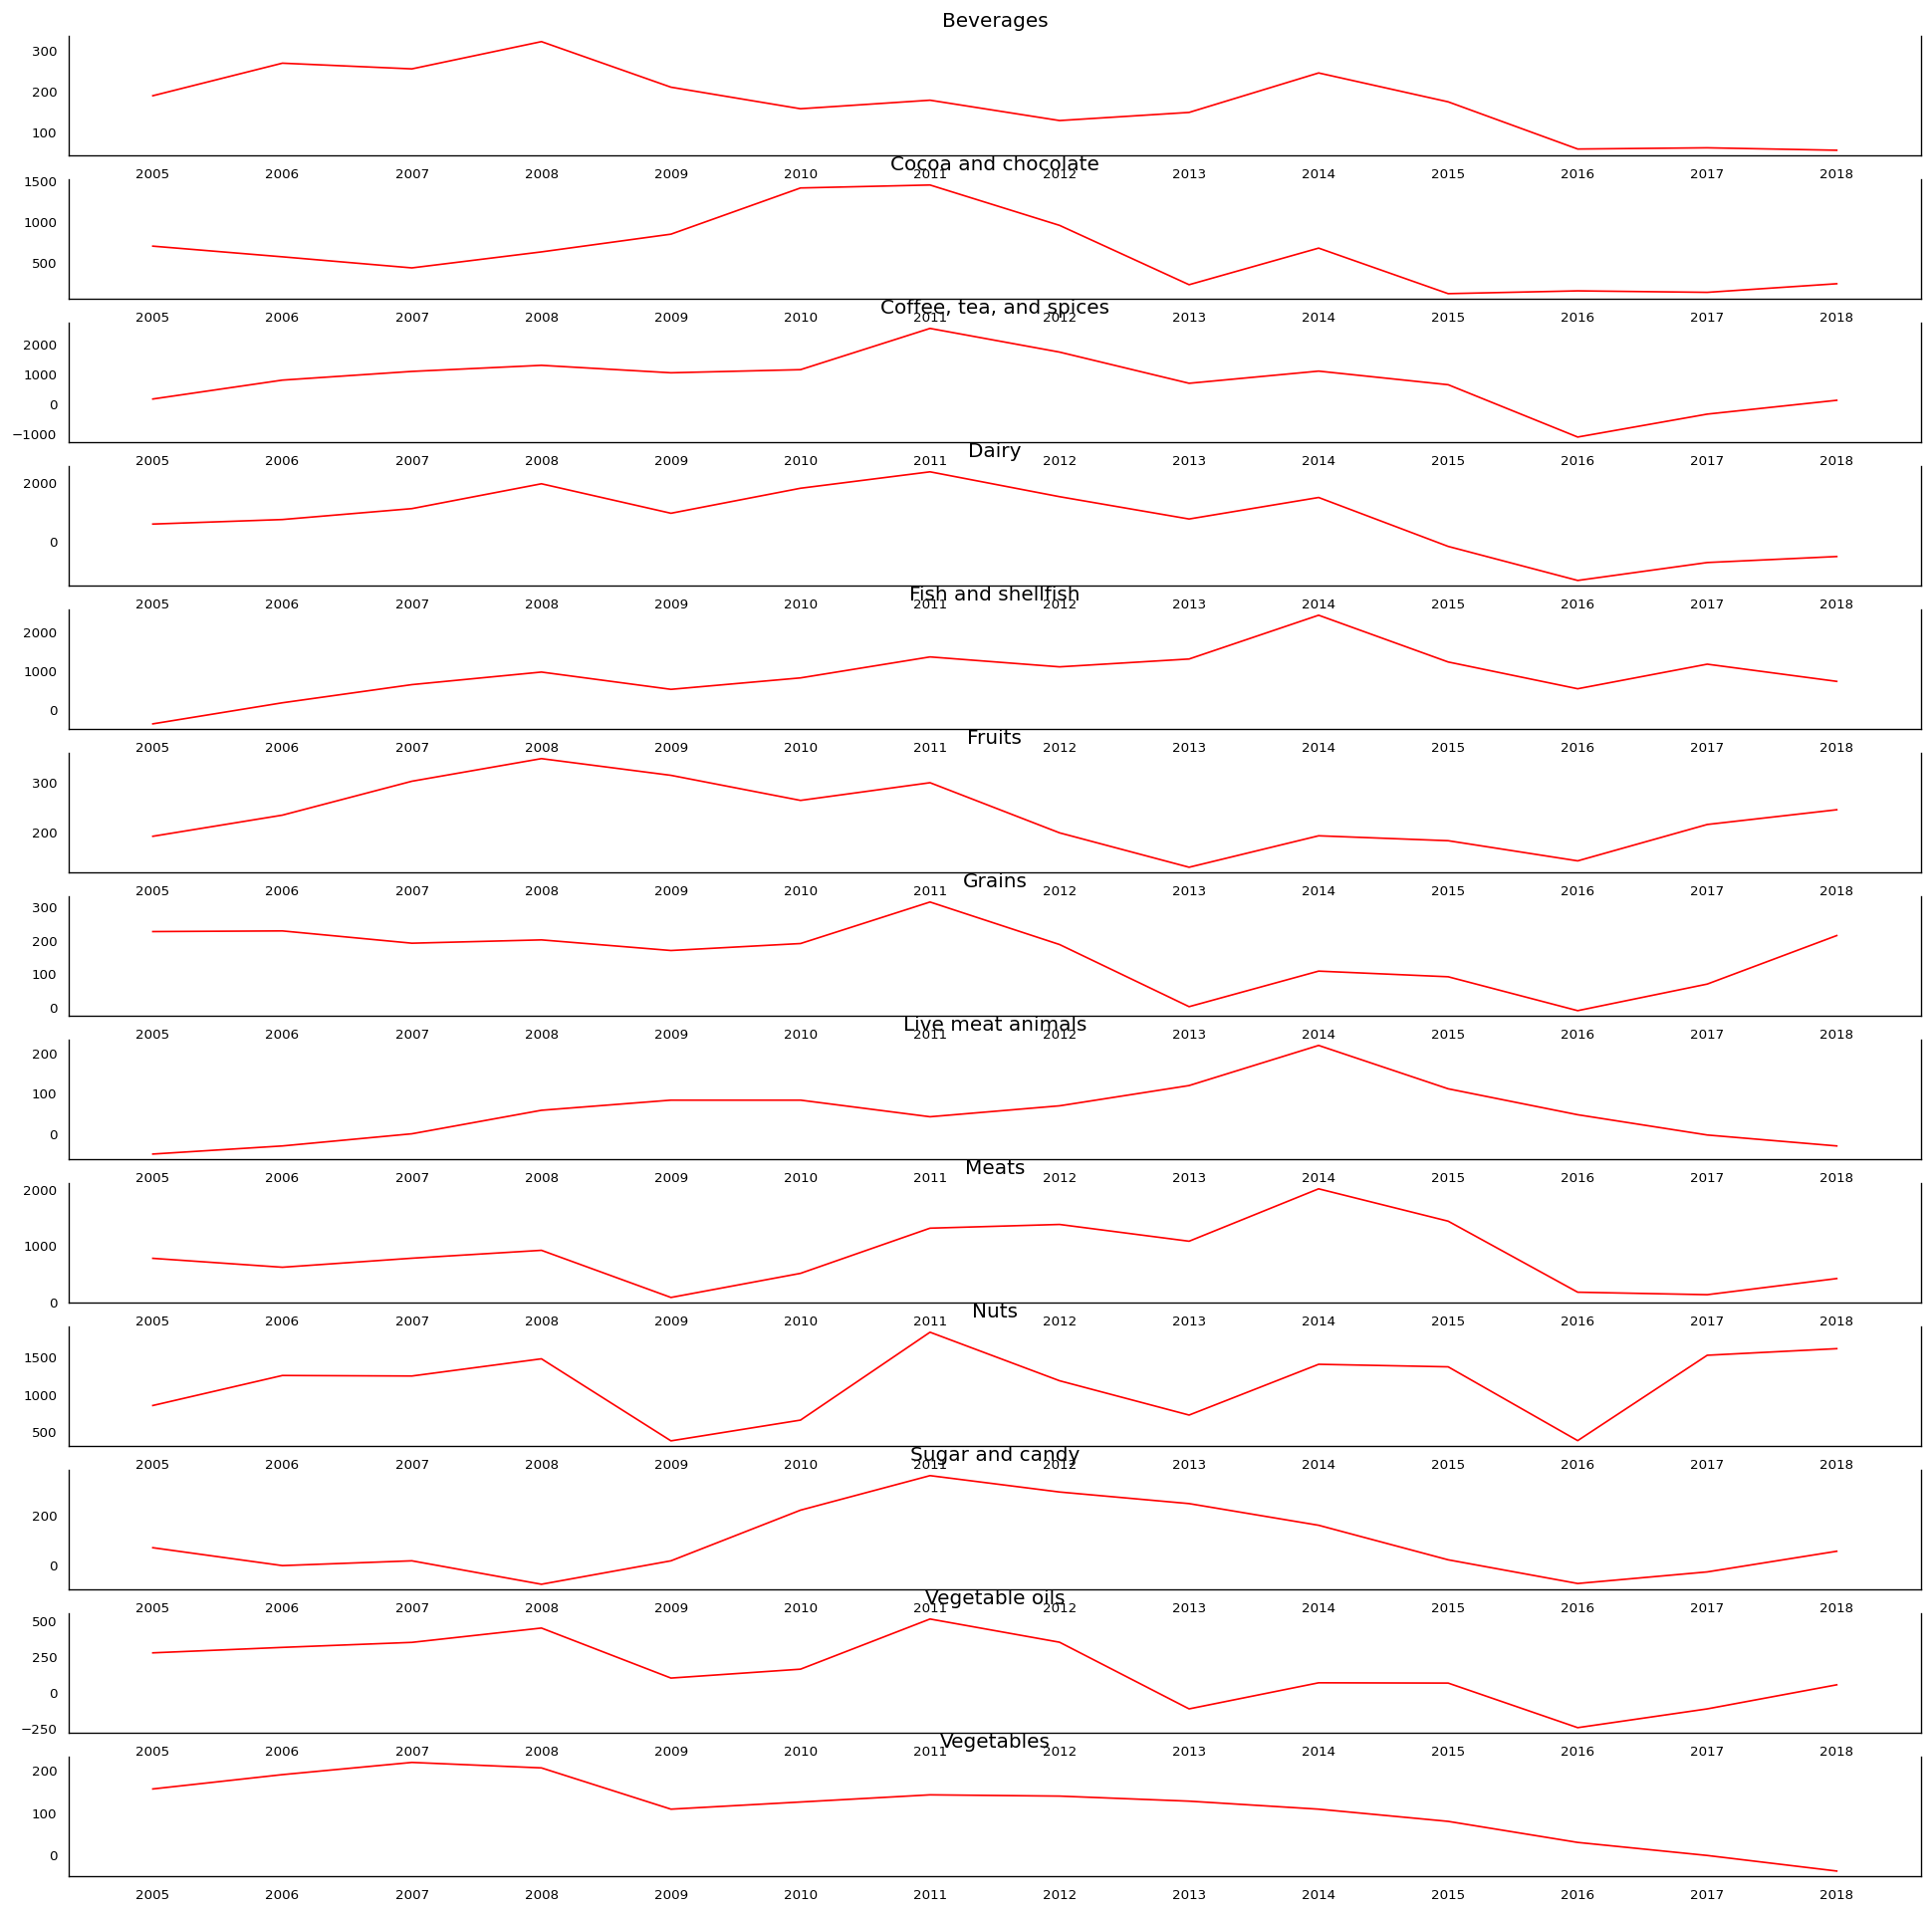

In [1059]:
fig, axes = plt.subplots(nrows=13, ncols=1, dpi=120, figsize=(20,20))
for i, ax in enumerate(axes.flatten()):
    d = X_train_transformed[X_train_transformed.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    ax.set_title(X_train_transformed.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=8)
plt.show();

In [1060]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns)  

,Beverages_x,Cocoa and chocolate_x,"Coffee, tea, and spices_x",Dairy_x,Fish and shellfish_x,Fruits_x,Grains_x,Live meat animals_x,Meats_x,Nuts_x,Sugar and candy_x,Vegetable oils_x,Vegetables_x
Beverages_y,1.0000,0.5765,0.5883,0.7069,0.0697,0.3895,0.0107,0.0022,0.5504,0.1550,0.4285,0.0517,0.0001
Cocoa and chocolate_y,0.1315,1.0000,0.7261,0.7097,0.1625,0.0051,0.2845,0.6987,0.0062,0.0469,0.0027,0.0773,0.1342
"Coffee, tea, and spices_y",0.8125,0.0025,1.0000,0.0002,0.0001,0.1224,0.2658,0.0877,0.0000,0.0000,0.0025,0.3979,0.2401
Dairy_y,0.2110,0.4110,0.2958,1.0000,0.0001,0.0566,0.0124,0.0370,0.0000,0.0035,0.0105,0.0008,0.2261
Fish and shellfish_y,0.2071,0.2314,0.0003,0.1118,1.0000,0.0000,0.0000,0.3280,0.5601,0.0100,0.0383,0.0003,0.9227
Fruits_y,0.5736,0.1748,0.0037,0.0326,0.0000,1.0000,0.0766,0.0348,0.0094,0.0013,0.0236,0.1179,0.4397
Grains_y,0.8397,0.0910,0.0997,0.0087,0.0003,0.1969,1.0000,0.0746,0.0000,0.0000,0.0000,0.0244,0.8059
Live meat animals_y,0.4517,0.0000,0.0027,0.0078,0.1395,0.0826,0.0010,1.0000,0.2697,0.2174,0.0315,0.0044,0.0232
Meats_y,0.5374,0.1572,0.1424,0.1466,0.5105,0.0039,0.0064,0.4408,1.0000,0.0154,0.0000,0.0000,0.6843
Nuts_y,0.1332,0.5392,0.3208,0.4353,0.3407,0.2447,0.1729,0.5501,0.4589,1.0000,0.4526,0.2568,0.0042


In [1061]:
def RMSEfromResid(X):
    summ = 0
    for i in X:
        summ+=i**2
    return((summ/len(X))**0.5)

#ARIMA Models selection
date = prices.index
X = prices['Fish and shellfish']
size = int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
date_test = date[size:]
def evaluate_arima_model(X, model_order):
    model_arima = ARIMA(X, order=model_order).fit()
    AIC = model_arima.aic
    BIC = model_arima.bic
    LLF = model_arima.llf
    RMSE = RMSEfromResid(model_arima.resid)
    return([AIC, BIC, LLF, RMSE])

import warnings
warnings.filterwarnings("ignore")
# evaluate combinations of p, d and q values for an ARIMA model
p_values = [0,1,2,3]
d_values = [1]
q_values = [0,1,2]
data = list()
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                [AIC, BIC, LLF, RMSE] = evaluate_arima_model(train, order)
                data.append([order,AIC, BIC, LLF, RMSE])
            except:
                continue
ARIMA_Models = pd.DataFrame(data,columns=['ARIMA', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'], )

evaluate_arima_model(X, order)
ARIMA_Models.sort_values(by=['RMSE'])

,ARIMA,AIC,BIC,Maximum Log-Likelihood,RMSE
8,"(2, 1, 2)",270.587037,275.038896,-130.293518,1363.043833
11,"(3, 1, 2)",274.065900,279.408130,-131.032950,1366.886123
10,"(3, 1, 1)",272.869982,277.321841,-131.434991,1369.164377
9,"(3, 1, 0)",271.187671,274.749158,-131.593836,1370.052106
7,"(2, 1, 1)",272.952058,276.513545,-132.476029,1374.767361
5,"(1, 1, 2)",274.092719,277.654206,-133.046359,1378.400631
2,"(0, 1, 2)",272.773406,275.444522,-133.386703,1380.469946
6,"(2, 1, 0)",273.275097,275.946213,-133.637549,1382.221260
4,"(1, 1, 1)",274.201868,276.872984,-134.100934,1385.405436
1,"(0, 1, 1)",272.242552,274.023296,-134.121276,1385.541755


In [1062]:
#ARIMA Prediction
history = [x for x in train]
predictions = list()
data=list()
#len_test = len(test)
len_test= len(test)
for t in range(len_test):
    model_arima = ARIMA(endog = history, order=(2, 1, 1)).fit()
    output = model_arima.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    data.append([date_test[t], obs, yhat])
    
RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)

Test RMSE: 678.449


In [1063]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('The Mean Absolute Percentage Error is: %.3f' % mape(np.array(test), predictions),'%.')

The Mean Absolute Percentage Error is: 5.814 %.


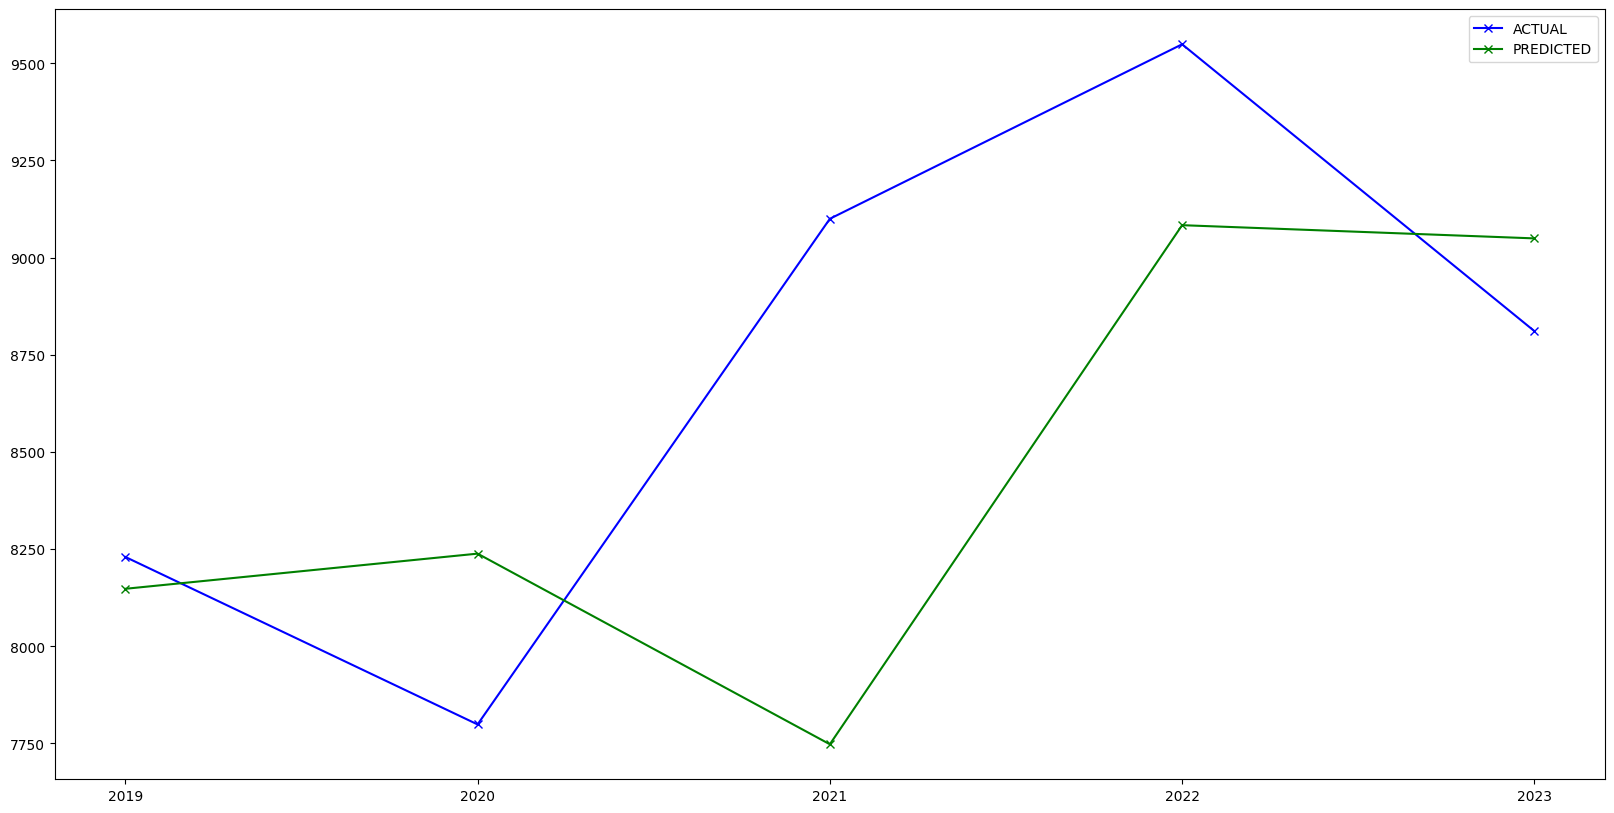

In [1064]:
# plot
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(date_test, test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test, predictions, color='green', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arimax_pred = predictions
arimax_RMSE = RMSE

In [1065]:
# ARIMAX Train-Test-Split:
prices['diffGLD'] = prices['Grains'].diff(2)
prices['diffSPX'] = prices['Fruits'].diff(2)
date = prices.index
prices['SPX_lag']=prices['diffSPX'].shift()
prices.dropna(inplace=True)
GLD_end = prices['Fish and shellfish']
SPX_ex = prices['SPX_lag']
m = len(GLD_end)
size = int(len(GLD_end)*0.8)
train, test = GLD_end[0:size], GLD_end[size:m]
ex_train, ex_test = SPX_ex[0:size], SPX_ex[size:m]
date_test = date[size:]

def evaluate_arimax_model(y, X, model_order):
    model_arimax = ARIMA(endog = y, exog=X, order=model_order).fit()
    AIC = model_arimax.aic
    BIC = model_arimax.bic
    LLF = model_arimax.llf
    RMSE = RMSEfromResid(model_arimax.resid)
    return([AIC, BIC, LLF, RMSE])

warnings.filterwarnings("ignore")
p_values = [0,1,2,3]
d_values = [1]
q_values = [0,1,2]
data = list()
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                [AIC, BIC, LLF, RMSE] = evaluate_arimax_model(train, ex_train, order)
                data.append([order,AIC, BIC, LLF, RMSE])
            except:
                continue

ARIMAX_Models = pd.DataFrame(data,columns=['ARIMAX', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],)

evaluate_arimax_model(train, ex_train, order)
ARIMAX_Models.sort_values(by=['RMSE'])

,ARIMAX,AIC,BIC,Maximum Log-Likelihood,RMSE
11,"(3, 1, 2)",218.301251,223.257602,-102.150625,1372.818837
8,"(2, 1, 2)",220.415719,224.664020,-104.207860,1380.516992
10,"(3, 1, 1)",218.167171,222.415472,-103.083586,1380.824335
5,"(1, 1, 2)",219.419039,222.959290,-104.709519,1385.875074
3,"(1, 1, 0)",218.128485,220.252635,-106.064242,1386.475153
1,"(0, 1, 1)",217.674498,219.798649,-105.837249,1386.804141
4,"(1, 1, 1)",219.149332,221.981533,-105.574666,1387.183808
7,"(2, 1, 1)",221.148566,224.688817,-105.574283,1387.250861
6,"(2, 1, 0)",219.454878,222.287079,-105.727439,1387.466107
9,"(3, 1, 0)",220.539377,224.079628,-105.269689,1387.524419


In [1066]:
# For predicting from grid search cv
history = [x for x in train]
his_u = ex_train
predictions = list()
data=list()
test_index = list()
for t in range(len(ex_test)):
    model_arimax = ARIMA(endog = history,exog=his_u, order=(2,1,1)).fit()
    output = model_arimax.forecast(steps=1, exog=ex_test.iloc[[t]])
    yhat = output[0]
    predictions.append(yhat)
    history.append(test[t])
    test_index.append(t)
    his_u = list(ex_train.values).append(ex_test.iloc[test_index])
    data.append([date_test[t], test[t], yhat])


RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'])
print('Test RMSE: %.3f' % RMSE)
print('The Mean Absolute Percentage Error is: %.3f' % mape(np.array(test), predictions),'%.')


Test RMSE: 600.740
The Mean Absolute Percentage Error is: 4.687 %.


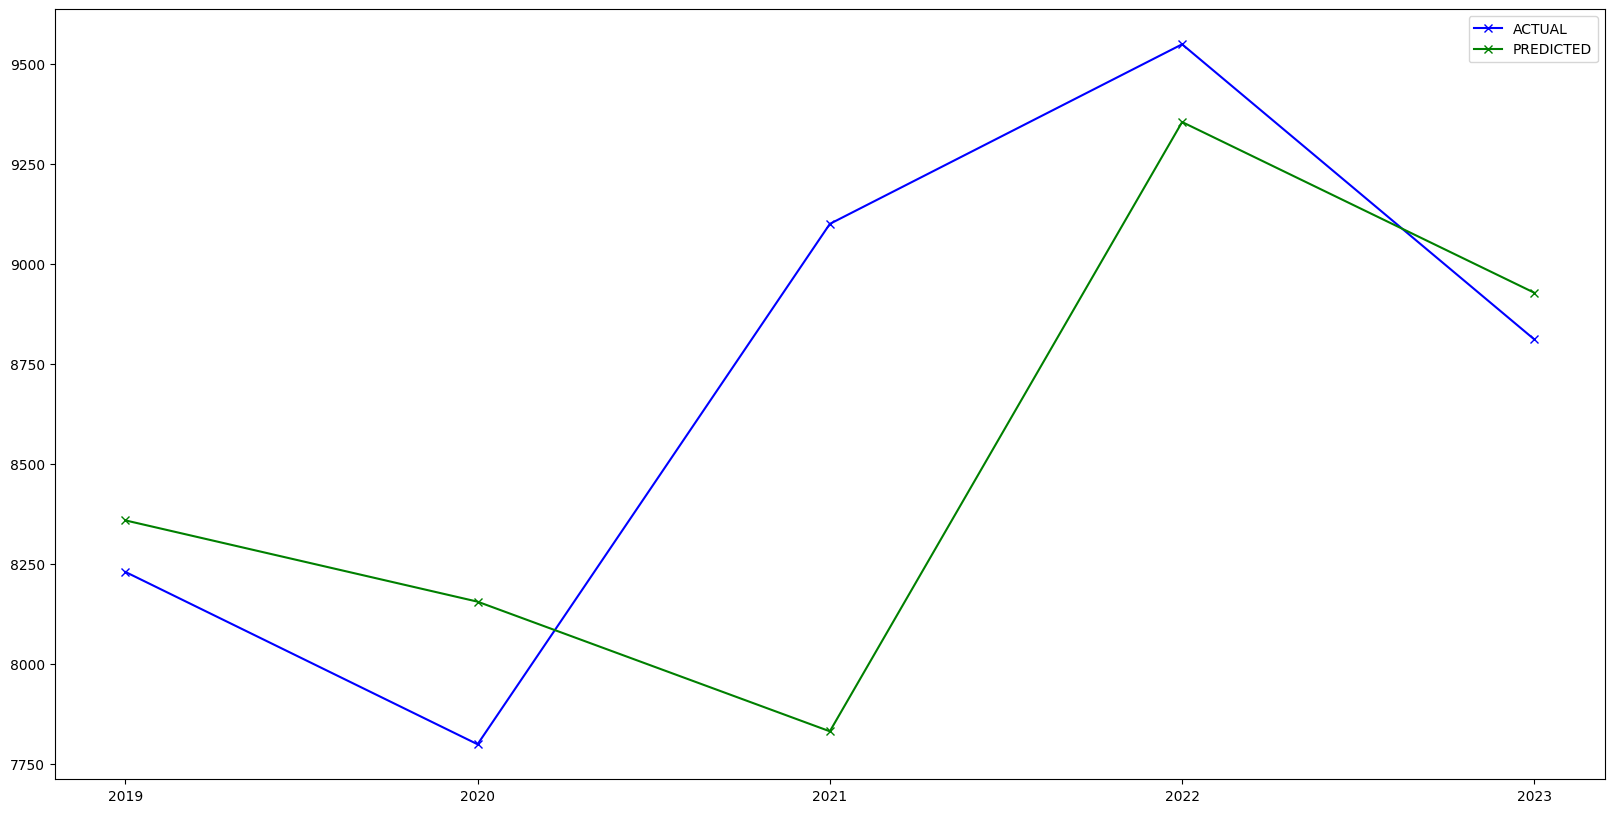

In [1067]:
# plot our calculations above to compare prediction to actual trend
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(date_test[3:], test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test[3:], predictions, color='green', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arimax_pred = predictions
arimax_RMSE = RMSE